In [1]:
import sys
import logging
import random

import pandas as pd
import cstrees
import matplotlib.pyplot as plt
import cstrees.cstree as ct
import cstrees.scoring as sc
import cstrees.stage as st
import cstrees.learning as ctl
import networkx as nx
import numpy as np
import pp

%load_ext autoreload
%autoreload 2
#logging.basicConfig(stream=sys.stderr, level=logging.DEBUG)
logging.basicConfig(stream=sys.stderr, level=logging.ERROR)


   a  b  c PROB_0 PROB_1
0  2  2  2    NaN    NaN
1  *  -  -    NaN    NaN
2  0  0  -    NaN    NaN
3  0  1  -    NaN    NaN
4  1  0  -    NaN    NaN
5  1  1  -    NaN    NaN
6  -  -  -    NaN    NaN
   a  b  c    PROB_0    PROB_1
0  2  2  2       NaN       NaN
1  *  -  -  0.724974  0.275026
2  0  0  -  0.368882  0.631118
3  0  1  -  0.077025  0.922975
4  1  0  -  0.261960  0.738040
5  1  1  -  0.793895  0.206105
6  -  -  -  0.495328  0.504672


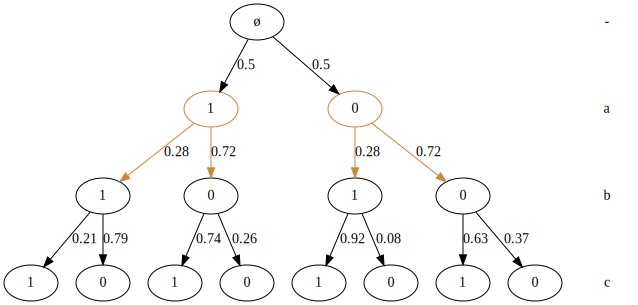

In [2]:
np.random.seed(50)
tree = ct.CStree([2] * 3, labels=["a", "b", "c"])

# V-structure
tree.update_stages({
    0: [st.Stage([{0, 1}])],
    1: [st.Stage([0, 0]), st.Stage([0, 1]), st.Stage([1, 0]), st.Stage([1, 1])]})

print(tree.to_df(write_probs=True))

tree.sample_stage_parameters(alpha=1.0)
print(tree.to_df(write_probs=True))
a = tree.plot(full=True)

# a.draw("testplot.png")
x = tree.sample(5000)
#print(x)

true_cdags = tree.to_minimal_context_graphs()
ct.write_minimal_context_graphs_to_files(true_cdags, prefix="mygraphs_")

a


In [3]:
tdf = tree.to_df(write_probs=True)
tdf

,a,b,c,PROB_0,PROB_1
0,2,2,2,NaN,NaN
1,*,-,-,0.724974,0.275026
2,0,0,-,0.368882,0.631118
3,0,1,-,0.077025,0.922975
4,1,0,-,0.261960,0.738040
5,1,1,-,0.793895,0.206105
6,-,-,-,0.495328,0.504672


In [4]:
dftree = ct.df_to_cstree(tdf)
dftree.to_df(write_probs=True)

,a,b,c,PROB_0,PROB_1
0,2,2,2,NaN,NaN
1,*,-,-,0.724974,0.275026
2,0,0,-,0.368882,0.631118
3,0,1,-,0.077025,0.922975
4,1,0,-,0.261960,0.738040
5,1,1,-,0.793895,0.206105
6,-,-,-,0.495328,0.504672


Use plot(full=True) to draw the full tree.


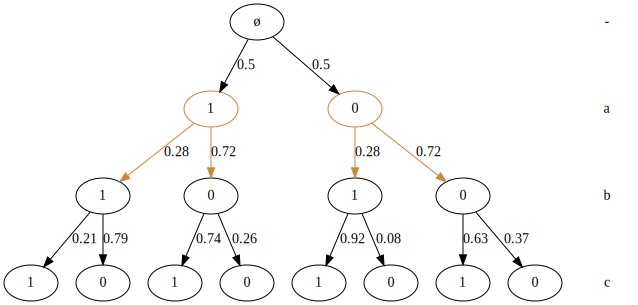

In [5]:
dftree.plot()

Use plot(full=True) to draw the full tree.


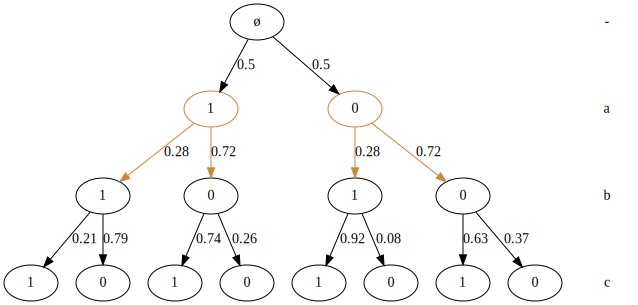

In [6]:
tree.estimate_stage_parameters(x)
tree.plot()

In [7]:

score_table, context_scores, context_counts = sc.order_score_tables(x, 
                                                                    max_cvars=2, 
                                                                    alpha_tot=1.0, 
                                                                    method="BDeu")
optord, score = ctl._find_optimal_order(score_table)
print("optimal order: {}, score {}".format(optord, score))

opttree = ctl._optimal_cstree_given_order(optord, context_scores)

# print("\nOptimal CStree stagings per level:")
# for key, val in opttree.stages.items():
#     if key == -1:
#         continue
#     print("level {}:".format(key))
#     for val2 in val:
#         print(val2)
        
opttree.estimate_stage_parameters(x, alpha_tot=1.0, method="BDeu")
opttree.plot()


Order score tables: 100%|██████████| 3/3 [00:00<00:00, 2270.87it/s]

optimal order: ['a', 'b', 'c'], score -9249.37276957637
Use plot(full=True) to draw the full tree.


In [8]:
opttree.to_df(write_probs=True)

,a,b,c,PROB_0,PROB_1
0,2,2,2,NaN,NaN
1,*,-,-,0.715157,0.284843
2,0,0,-,0.374334,0.625666
3,0,1,-,0.090170,0.909830
4,1,0,-,0.260057,0.739943
5,1,1,-,0.814703,0.185297
6,-,-,-,0.510398,0.489602


In [9]:
for lev, staging in opttree.stages.items():
     
    print(lev+-1)
    for stage in staging:
        print(stage)

-1
[{0, 1}]; probs: [0.7151569686062788, 0.28484303139372125]; color: peru
0
[0, 0]; probs: [0.3743341073623822, 0.6256658926376178]; color: black
[0, 1]; probs: [0.09016960886119765, 0.9098303911388024]; color: black
[1, 0]; probs: [0.2600572655690766, 0.7399427344309234]; color: black
[1, 1]; probs: [0.8147027411890353, 0.18529725881096476]; color: black
1
-2
[]; probs: [0.5103979204159168, 0.4896020795840832]; color: black


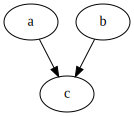

In [10]:
opt_cdags = opttree.to_minimal_context_graphs()
for key, val in opt_cdags.items():
    agraph = nx.nx_agraph.to_agraph(val)
    agraph.layout("dot")
    agraph.draw("testing/"+str(key) + "_opt.png",
                args='-Glabel="'+str(key)+'"   ')

agraph

In [11]:
tree = ctl.find_optimal_cstree(x, max_cvars=2, alpha_tot=1.0, method="BDeu")

tree.to_df()

Order score tables: 100%|██████████| 3/3 [00:00<00:00, 2619.80it/s]


,a,b,c
0,2,2,2
1,*,-,-
2,0,0,-
3,0,1,-
4,1,0,-
5,1,1,-
6,-,-,-
